In [1]:
from pylab import *

In [3]:
def mi_Euler(ec_EDO , t , x0 , args=[] , delta=0.1):
    # ec_EDO es el sistema a integrar (t,x)
    # t es el intervalo de integracion
    # x0 punto inicial
    tiempos = arange(t[0],t[1]+delta,delta)
    M , N = len(x0) , len(tiempos)
    sol = zeros( (M,N) )
    sol[:,0] = x0
    for i in range(N-1):
        if len(args) == 0:
            sol[:,i+1] = sol[:,i] + delta*ec_EDO(tiempos[i],sol[:,i])
        else:
            sol[:,i+1] = sol[:,i] + delta*ec_EDO(tiempos[i],sol[:,i],args)
    return sol,tiempos

def mi_Euler_Jacobi(ec_EDO , t , x0 , Jac_EDO , args=[] , delta=0.1):
    # ec_EDO es el sistema a integrar (t,x)
    # t es el intervalo de integracion
    # x0 punto inicial
    tiempos = arange(t[0],t[1]+delta,delta)
    M , N = len(x0) , len(tiempos)
    sol = zeros( (M,N) )
    sol[:,0] = x0
    for i in range(N-1):
        a_Euler = delta*ec_EDO(tiempos[i],sol[:,i])
        a_Jacobi = 0.5*delta*delta*dot(Jac_EDO(tiempos[i],sol[:,i]),ec_EDO(tiempos[i],sol[:,i]))
        sol[:,i+1] = sol[:,i] + a_Euler + a_Jacobi
    return sol,tiempos    

def RK2(ec_EDO , t , x0 , args=[] , delta=0.1):
    t_n = arange(t[0],t[1]+delta,delta)
    M , N = len(x0),len(t_n)
    sol = zeros( (M,N) )
    sol[:,0] = x0
    for i in range(N-1):
        t_med = 0.5*(t_n[i] + t_n[i+1])
        x_med = sol[:,i] + 0.5*delta*ec_EDO(t_n[i],sol[:,i])
        sol[:,i+1] = sol[:,i] + delta*ec_EDO(t_med,x_med)
    return sol,t_n

def RK4(ec_EDO , t , x0 , args=[] , delta=0.1):
    t_n = arange(t[0],t[1]+delta,delta)
    M , N = len(x0),len(t_n)
    sol = zeros( (M,N) )
    sol[:,0] = x0
    for i in range(N-1):
        t_med = 0.5*(t_n[i] + t_n[i+1])
        k1 = ec_EDO(t_n[i],sol[:,i])
        x_med = sol[:,i] + 0.5*delta*k1
        k2 = ec_EDO(t_med,x_med)
        x_med = sol[:,i] + 0.5*delta*k2
        k3 = ec_EDO(t_med,x_med)
        x_med = sol[:,i] + delta*k3
        k4 = ec_EDO(t_n[i+1],x_med)
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return sol,t_n

$$
\dot \theta = v_{\theta} \\
\dot v_{\theta} = -\frac{g}{\ell} \sin(\theta)
$$

In [9]:
def pendulo(t,y,gl=1):
    # th , v_th = y[0] , y[1]
    return array([ y[1] , -gl*sin(y[0]) ])

def Jac_pendulo(t,y,gl=1):
    return array( [ [ 0 , 1 ] , [ -gl*cos(y[0]) , 0 ] ] )

In [29]:
ci = [pi/4,0]
t = [0,50]
sol_Euler , t_E = mi_Euler(pendulo,t,ci,delta=0.0008)
sol_EJ , t_EJ = mi_Euler_Jacobi(pendulo,t,ci,Jac_pendulo)
sol_rk2 , t_2 = RK2(pendulo,t,ci)
sol_rk4 , t_4 = RK4(pendulo,t,ci)
sol_rk4_aux , t_4_aux = RK4(pendulo,t,ci,delta=0.0008)

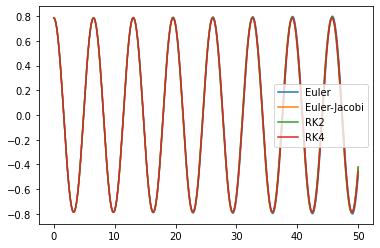

In [30]:
plot(t_E,sol_Euler[0],label='Euler')
plot(t_EJ,sol_EJ[0],label='Euler-Jacobi')
plot(t_2,sol_rk2[0],label='RK2')
plot(t_4,sol_rk4[0],label='RK4')
plot()
legend()
show()

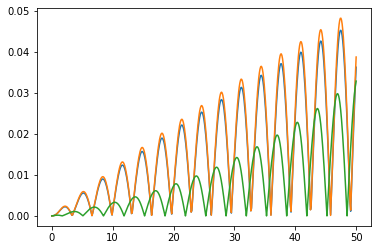

In [31]:
plot(t_2,abs(sol_rk2[0]-sol_rk4[0]))
plot(t_2,abs(sol_EJ[0]-sol_rk4[0]))
plot(t_4_aux,abs(sol_Euler[0]-sol_rk4_aux[0]))
show()

In [33]:
%%timeit
sol_rk4 , t_4 = RK4(pendulo,t,ci)

7.26 ms ± 25 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%%timeit
sol_rk2 , t_2 = RK2(pendulo,t,ci)

3.37 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%%timeit
sol_EJ , t_EJ = mi_Euler_Jacobi(pendulo,t,ci,Jac_pendulo)

5.45 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
%%timeit
sol_Euler , t_E = mi_Euler(pendulo,t,ci,delta=0.0008)

229 ms ± 9.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
